# Linear Regression

Linear Regression is one of the most fundamental algorithms in the Machine Learning world.
A Linear Regression model predicts the dependent variable using a regression line based on the independent variables. The equation of the Linear Regression is:

                                          Y=a+b*X + e 
Where, a is the intercept, b is the slope of the line, and e is the error term. The equation above is used to predict the value of the target variable based on the given predictor variable(s).

# The Problem Statement

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?


In [1]:
# necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Features - Advertising with TV, radio, newspaper

Target Variable - Sales(in response to the types of advertising)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

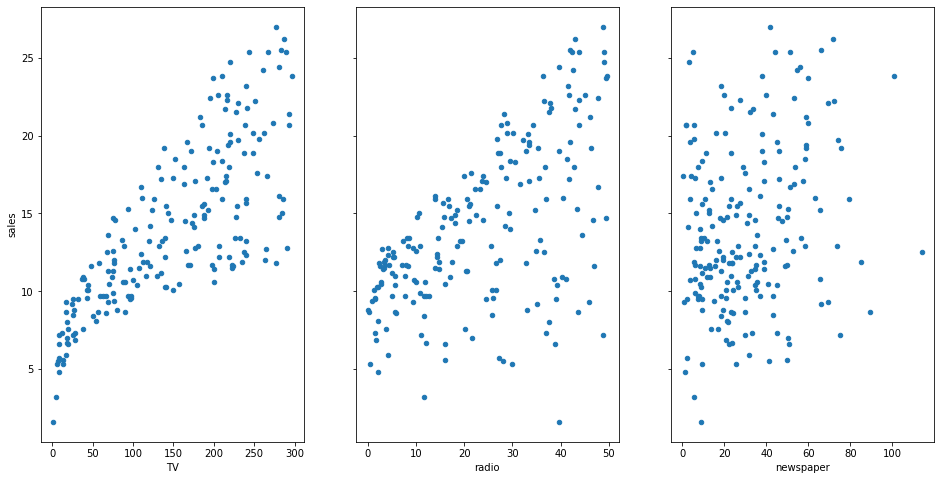

In [6]:
# Visualize the influence of the Features over the Target Variable using scatterplots

fig, axs = plt.subplots(1, 3, sharey=True )
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16,8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

From the relationship diagrams above, it can be observed that there seems to be a linear relationship between the features TV ad, Radio ad and the sales is almost a linear one.

<img src="LinearGraph.png" width="300">

# Simple Linear Regression

Simple Linear regression is a method for predicting a quantitative response using a single feature ("input variable"). The mathematical equation is:

Y = mx + C

What do terms represent?

- 𝑦  is the response or the target variable
- 𝑥  is the feature
- m  is the coefficient of x
- C  is the intercept

Estimating ("Learning") Model Coefficients
The coefficients are estimated using the least-squares criterion, i.e., the best fit line has to be calculated that minimizes the sum of squared residuals (or "sum of squared errors").


#### The mathematics involved

Take a quick look at the plot created. Now consider each point, and know that each of them has a coordinate in the form (X, Y). Now draw an imaginary line between each point and the current "best-fit" line. We'll call the distance between each point and the current best-fit line as D. To get a quick image of what we're trying to visualize, take a look at the picture below:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png">

What elements are present in the diagram?
- The red points are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The green lines are the **residuals**, which is the distance between the observed values and the least squares line.

we'll let scikit-learn do the job for us by solving the equation for least-squares line

Let’s see the underlying assumptions: -
* The regression model is linear in terms of coefficients and error term.
* The mean of the residuals is zero.
* The error terms are not correlated with each other, i.e. given an error value; we cannot predict the next error value.
* The independent variables(x) are uncorrelated with the residual term, also termed as **exogeneity**. This, in layman term, generalises that in no way should the error term be predicted given the value of independent variables.
* The error terms have a constant variance, i.e. **homoscedasticity**.
* No Multicollinearity, i.e. no independent variables should be correlated with each other or affect one another. If there is multicollinearity, the precision of prediction by the OLS model decreases.
* The error terms are normally distributed.

The general equation of a straight line is:$$𝑦={mx+b}$$
It means that if we have the value of m and b, we can predict all the values of y for corresponding x.
During construction of a Linear Regression Model, the computer tries to calculate the values of m and b to get a straight line.
But the question is:
###### How Do you Know this is the best fit line?
The best fit line is obtained by minimizing the _residual_.
Residual is the distance between the actual Y and the predicted Y, as shown below:
<img src="residual.png" width="300">

Mathematically, Residual is: $$r={y-(mx+b)}$$

For getting the best fit line, residual should be minimum.

if we'd have an equation of one dependent and one independent variable the minima will look as follows:
<img src="minima2.png" width="300">

But as the residual's minima is dependent on two variables m and b, it becomes a _Paraboloid_ and the appropriate m and b are calculated using _*Gradient Descent*_ as shown below:
<img src="GradientDescent.gif" width="300"> Photo:Google


### Building the model

In [7]:
# create X and y axis
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern - import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [8]:
lm.predict([[5567]])

array([271.66907084])

### Prediction using the model

In [9]:
# Calculate the prediction
# y = mX + c
# m = 0.04753664 
# c = 7.032593549127693
# let's take an example of 50 USD advertising via Television
# X = 50
7.032593549127693 + 0.04753664 * 50

9.409425549127693

In [10]:
# Let's do the same calculations using Code
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [11]:
lm.predict(X_new)

array([9.40942557])

### Plotting the Least Squares Line

#### $R^2$ statistics
The R-squared statistic provides a measure of fit. It takes the form of a proportion—the proportion of variance
explained—and so it always takes on a value between 0 and 1. 
In simple words, it represents how much of our data is being explained by our model. 
For example,  $R^2$ statistic = 0.75, it says that our model fits 75 % of the total data set.
Similarly, if it is 0, it means none of the data points is being explained and a value of 1 represents 100% data explanation.
Mathematically $R^2$ statistic is calculated as :
<img src="RSquared.PNG" width="300">

The closer the value of R2 is to 1 the better the model fits our data. If R2 comes below 0(which is a possibility) that means the model is so bad that it is performing even worse than the average best fit line.

### Adjusted $R^2$ statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.

In [18]:
X_minmax = pd.DataFrame({'TV':[data.TV.min(), data.TV.max()]})
X_minmax.head()

,TV
0,0.7
1,296.4


In [19]:
prediction = lm.predict(X_minmax)
prediction

array([ 7.0658692 , 21.12245377])

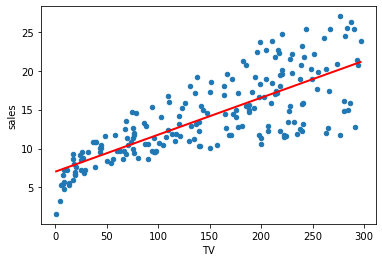

In [20]:
# plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# now plot the least squares line
plt.plot(X_minmax, prediction, c='red', linewidth=2)

### Model Confidence

**Question:** Is linear regression a low bias/high variance model or a high bias/low variance model?

**Answer:** It's a High bias/low variance model. Even after repeated sampling, the best fit line will stay roughly in the same position (low variance), but the average of the models created after repeated sampling won't do a great job in capturing the perfect relationship (high bias). Low variance is helpful when we don't have less training data! 

If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: 
If the population from which this sample is drawn, is **sampled 100 times**, then approximately **95 (out of 100) of those confidence intervals** shall contain the "true" coefficients.

In [21]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV', data=data).fit()
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way actually to know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

### Hypothesis Testing and p-values

**Hypothesis testing** is Closely related to confidence intervals. We start with a **null hypothesis** and an **alternate hypothesis** (that is opposite to the null). Then, we check whether the data **rejects the null hypothesis** or **fails to reject the null hypothesis**.

("Failing to reject" the null hypothesis does not mean "accepting" the null hypothesis. The alternative hypothesis might indeed be true, but that we just don't have enough data to prove that.)

The conventional hypothesis test is as follows:
- **Null hypothesis:** No relationship exists between TV advertisements and Sales (and hence $\beta_1$ equals zero).
- **Alternative hypothesis:** There exists a relationship between TV advertisements and Sales (and hence, $\beta_1$ is not equal to zero).

How do we test this? We reject the null hypothesis (and thus believe the alternative hypothesis) if the 95% confidence interval **does not include zero**. The **p-value** represents the probability of the coefficient actually being zero.


In [23]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

Thus, a p-value of less than 0.05 is a way to decide whether there is any relationship between the feature in consideration and the response or not. Using 0.05 as the cutoff is just a convention.

In this case, the p-value for TV ads is way less than 0.05, and so we **believe** that there is a relationship between TV advertisements and Sales.

Note that we generally ignore the p-value for the intercept.

### How Well Does the Model Fit the data?

One of the most generic way to evaluate the fit of a linear model is by computing the **R-squared** value. R-squared explains the**proportion of variance**, i.e., the proportion of variance in the observed data which the model explains, or the reduction in error over the **null model**. (A null model only predicts the mean of all the observed responses, and thus it only has an intercept and no slope.)

The value of R-squared lies between 0 and 1. A value closer to 1 is better as it means that more variance is explained by the model. 

In [24]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is it a "good" R-squared value? Now, that’s hard to say. In reality, the domain to which the data belongs to plays a significant role in deciding the threshold for the R-squared value. Therefore, it's a tool for **comparing different models**.